In [1]:
from pathlib import Path
import json
import pandas as pd

# Data loading

In [29]:
pubmed_oracle_path = Path("results/exp5/pubmed_val_oracle/summaries.json")

In [30]:
pubmed_oracle_docs = json.loads(pubmed_oracle_path.read_text())
pubmed_oracle_sums = [[x[0] for x in d["summary"]] for d in pubmed_oracle_docs]

In [31]:
pubmed_hiporank_path = Path("results/exp1/pubmed_val-bert-cos-edge-add_f=0.0_b=1.0_s=0.5/summaries.json")
pubmed_pacsum_path = Path("results/exp1/pubmed_val_no_sections-pacsum_bert-cos-order-add_f=0.0_b=1.0_s=1.5/summaries.json")

In [32]:
pubmed_hiporank_docs = json.loads(pubmed_hiporank_path.read_text())
pubmed_hiporank_sums = [[x[0] for x in d["summary"]] for d in pubmed_hiporank_docs]
pubmed_pacsum_docs = json.loads(pubmed_pacsum_path.read_text())
pubmed_pacsum_sums = [[x[0] for x in d["summary"]] for d in pubmed_pacsum_docs]

# Positions

In [49]:
pubmed_oracle_positions = [[x[-1]/d["num_sents"] for x in d["summary"]] 
                           for d in sorted(pubmed_oracle_docs, key=lambda x: x["num_sents"])]

pubmed_pacsum_positions = [[x[-1]/d["num_sents"] for x in d["summary"]] 
                           for d in sorted(pubmed_pacsum_docs, key=lambda x: x["num_sents"])]

pubmed_hiporank_positions = [[x[-1]/d["num_sents"] for x in d["summary"]] 
                           for d in sorted(pubmed_hiporank_docs, key=lambda x: x["num_sents"])]
oracle_x = []
oracle_y = []
oracle_a = []
pacsum_x = []
pacsum_y = []
pacsum_a = []
hiporank_x = []
hiporank_y = []
hiporank_a = []

for i,p in enumerate(pubmed_oracle_positions):
    oracle_x += [i for _ in p]
    oracle_y += p
    oracle_a += [(x/len(p), 1-x/len(p),0,0.8) for x,_ in enumerate(p)]
for i,p in enumerate(pubmed_pacsum_positions):
    pacsum_x += [i for _ in p]
    pacsum_y += p
    pacsum_a += [(x/len(p), 1-x/len(p),0,0.8) for x,_ in enumerate(p)]
for i,p in enumerate(pubmed_hiporank_positions):
    hiporank_x += [i for _ in p]
    hiporank_y += p
    hiporank_a += [(x/len(p), 1-x/len(p),0,0.8) for x,_ in enumerate(p)]


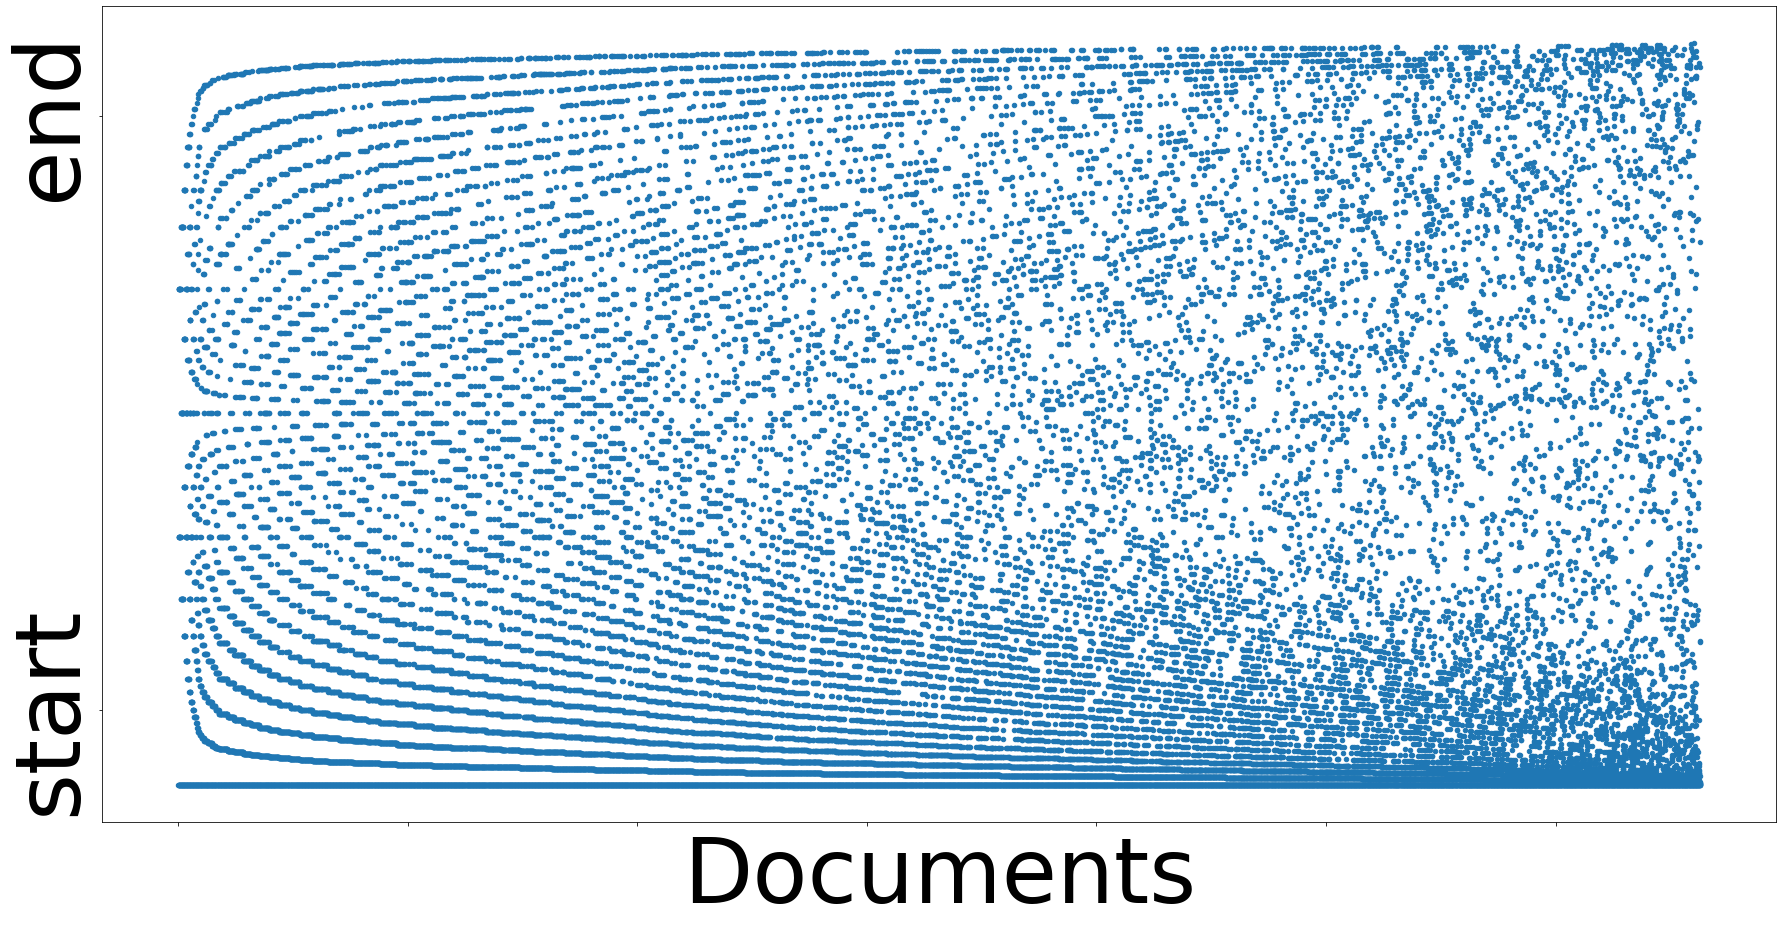

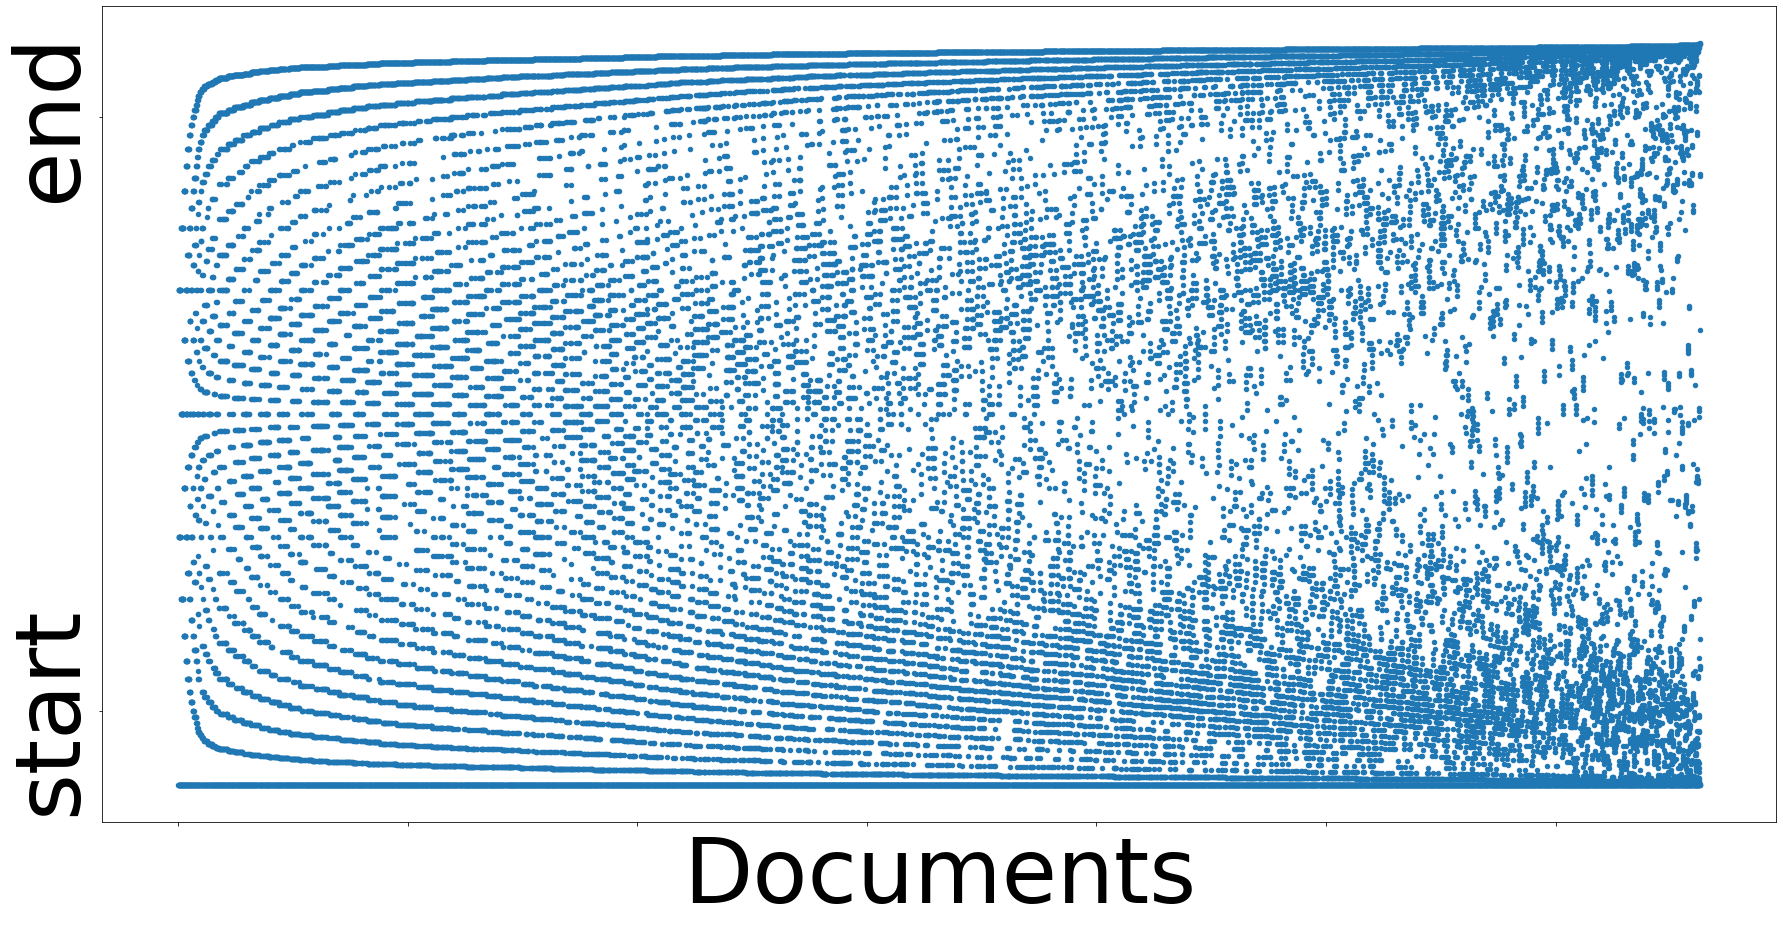

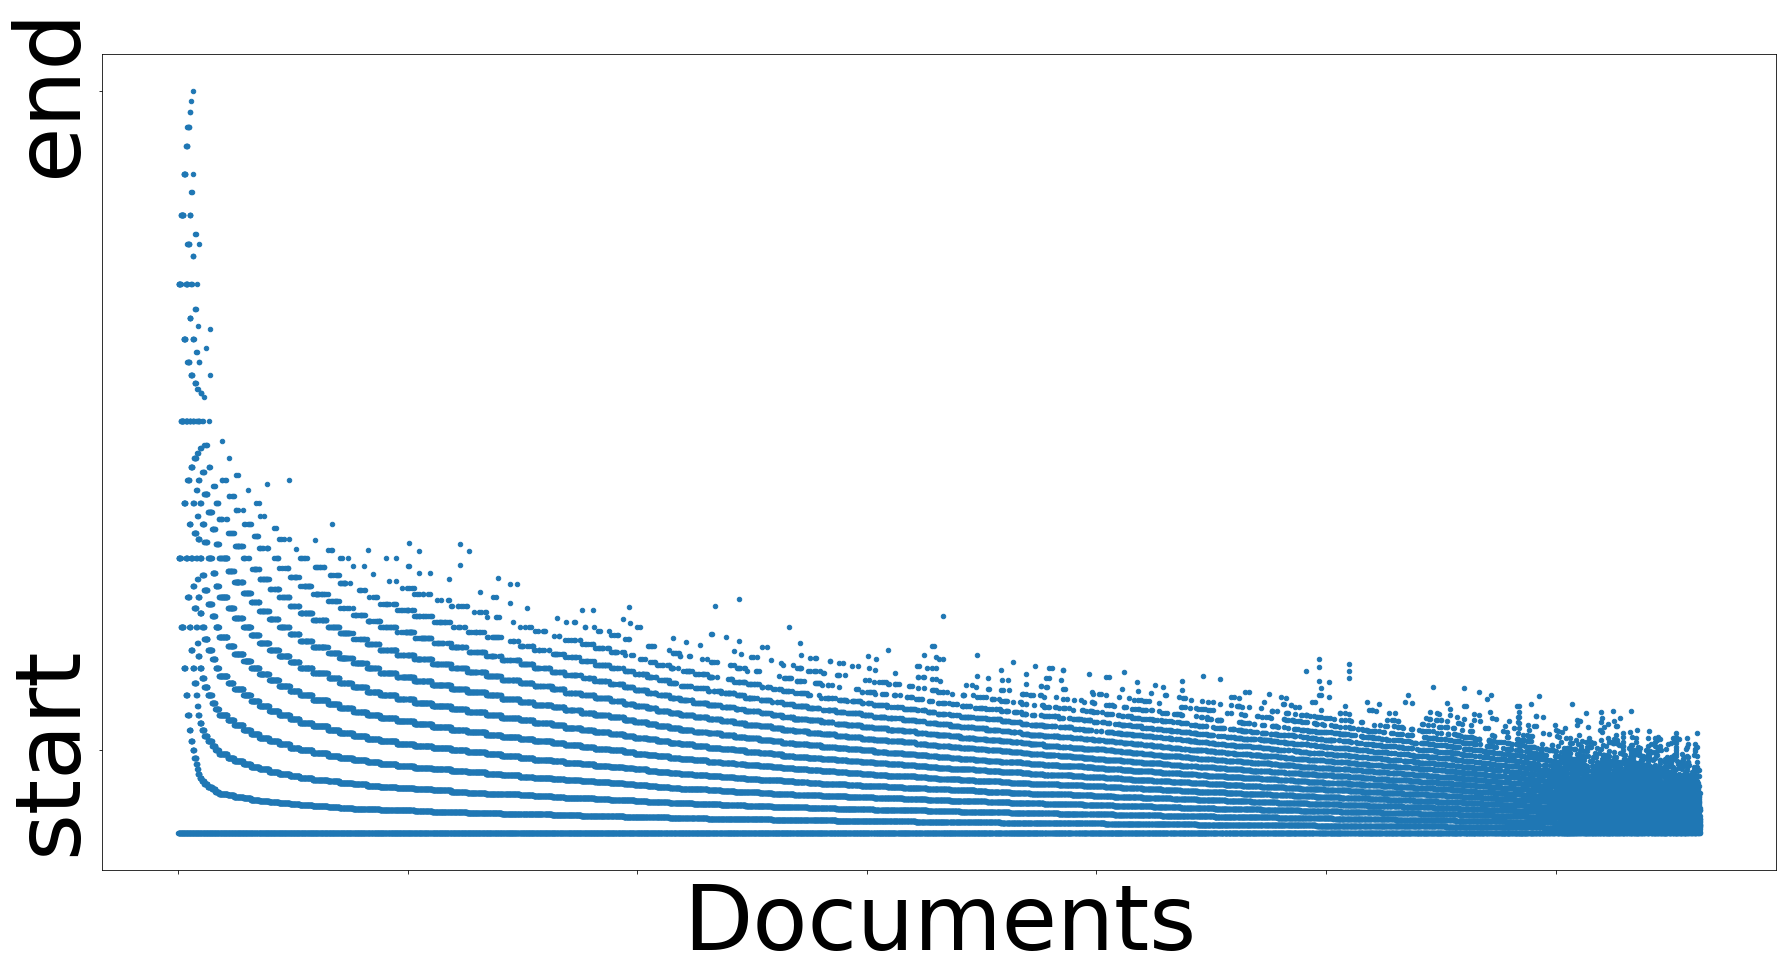

In [53]:
FONTSIZE = 90
FIG_X = 30
FIG_Y = 15
df_pacsum = pd.DataFrame()
df_hiporank = pd.DataFrame()
df_oracle = pd.DataFrame()

df_pacsum["Position"] = pacsum_y
df_pacsum["Document"] = pacsum_x

df_hiporank["Position"] = hiporank_y
df_hiporank["Document"] = hiporank_x

df_oracle["Position"] = oracle_y
df_oracle["Document"] = oracle_x

plt1 = df_oracle.plot(x="Document", y="Position",
                      kind="scatter",  figsize=(FIG_X,FIG_Y), fontsize=FONTSIZE)
plt1.set_xlabel("Documents", size = FONTSIZE)
plt1.set_ylabel("", size = FONTSIZE)

plt1.set_yticks([0.1,0.9])
plt1.set_yticklabels(["start","end"], rotation=90, va="center")
plt1.set_xticklabels([])

plt2 = df_hiporank.plot(x="Document", y="Position",
                        kind="scatter", figsize=(FIG_X,FIG_Y), fontsize=FONTSIZE)
plt2.set_xlabel("Documents", size = FONTSIZE)
plt2.set_ylabel("", size = FONTSIZE)


plt2.set_yticks([0.1,0.9])
plt2.set_yticklabels(["start","end"], rotation=90, va="center")
plt2.set_xticklabels([])


plt3 = df_pacsum.plot(x="Document", y="Position",
                      kind="scatter", figsize=(FIG_X,FIG_Y), fontsize=FONTSIZE)
plt3.set_xlabel("Documents", size = FONTSIZE)
plt3.set_ylabel("", size = FONTSIZE)


plt3.set_yticks([0.1,0.9])
plt3.set_yticklabels(["start","end"], rotation=90, va="center")
plt3.set_xticklabels([])


plt1.figure.savefig('figs/positions_pubmed_oracle.png')
plt2.figure.savefig('figs/positions_pubmed_hr.png')
plt3.figure.savefig('figs/positions_pubmed_ps.png')

# Data loading

In [37]:
arxiv_oracle_path = Path("results/exp5/arxiv_val_oracle/summaries.json")

In [38]:
arxiv_oracle_docs = json.loads(arxiv_oracle_path.read_text())
arxiv_oracle_sums = [[x[0] for x in d["summary"]] for d in arxiv_oracle_docs]

In [39]:
arxiv_hiporank_path = Path("results/exp7/arxiv_val-pacsum_bert-cos-edge-add_f=0.0_b=1.0_s=1.0/summaries.json")
arxiv_pacsum_path = Path("results/exp7/arxiv_val_no_sections-pacsum_bert-cos-order-add_f=0.0_b=1.0_s=1.0/summaries.json")

In [40]:
arxiv_hiporank_docs = json.loads(arxiv_hiporank_path.read_text())
arxiv_hiporank_sums = [[x[0] for x in d["summary"]] for d in arxiv_hiporank_docs]
arxiv_pacsum_docs = json.loads(arxiv_pacsum_path.read_text())
arxiv_pacsum_sums = [[x[0] for x in d["summary"]] for d in arxiv_pacsum_docs]

In [41]:
arxiv_docs = [json.loads(x) for x in Path("data/arxiv-release/val.txt").read_text().split("\n")[:-1]]

# Positions

In [54]:
arxiv_oracle_positions = [[x[-1]/d["num_sents"] for x in d["summary"]] 
                           for d in sorted(arxiv_oracle_docs, key=lambda x: x["num_sents"])]

arxiv_pacsum_positions = [[x[-1]/d["num_sents"] for x in d["summary"]] 
                           for d in sorted(arxiv_pacsum_docs, key=lambda x: x["num_sents"])]

arxiv_hiporank_positions = [[x[-1]/d["num_sents"] for x in d["summary"]] 
                           for d in sorted(arxiv_hiporank_docs, key=lambda x: x["num_sents"])]
oracle_x = []
oracle_y = []
oracle_a = []
pacsum_x = []
pacsum_y = []
pacsum_a = []
hiporank_x = []
hiporank_y = []
hiporank_a = []

for i,p in enumerate(arxiv_oracle_positions):
    oracle_x += [i for _ in p]
    oracle_y += p
    oracle_a += [(x/len(p), 1-x/len(p),0,0.8) for x,_ in enumerate(p)]
for i,p in enumerate(arxiv_pacsum_positions):
    pacsum_x += [i for _ in p]
    pacsum_y += p
    pacsum_a += [(x/len(p), 1-x/len(p),0,0.8) for x,_ in enumerate(p)]
for i,p in enumerate(arxiv_hiporank_positions):
    hiporank_x += [i for _ in p]
    hiporank_y += p
    hiporank_a += [(x/len(p), 1-x/len(p),0,0.8) for x,_ in enumerate(p)]


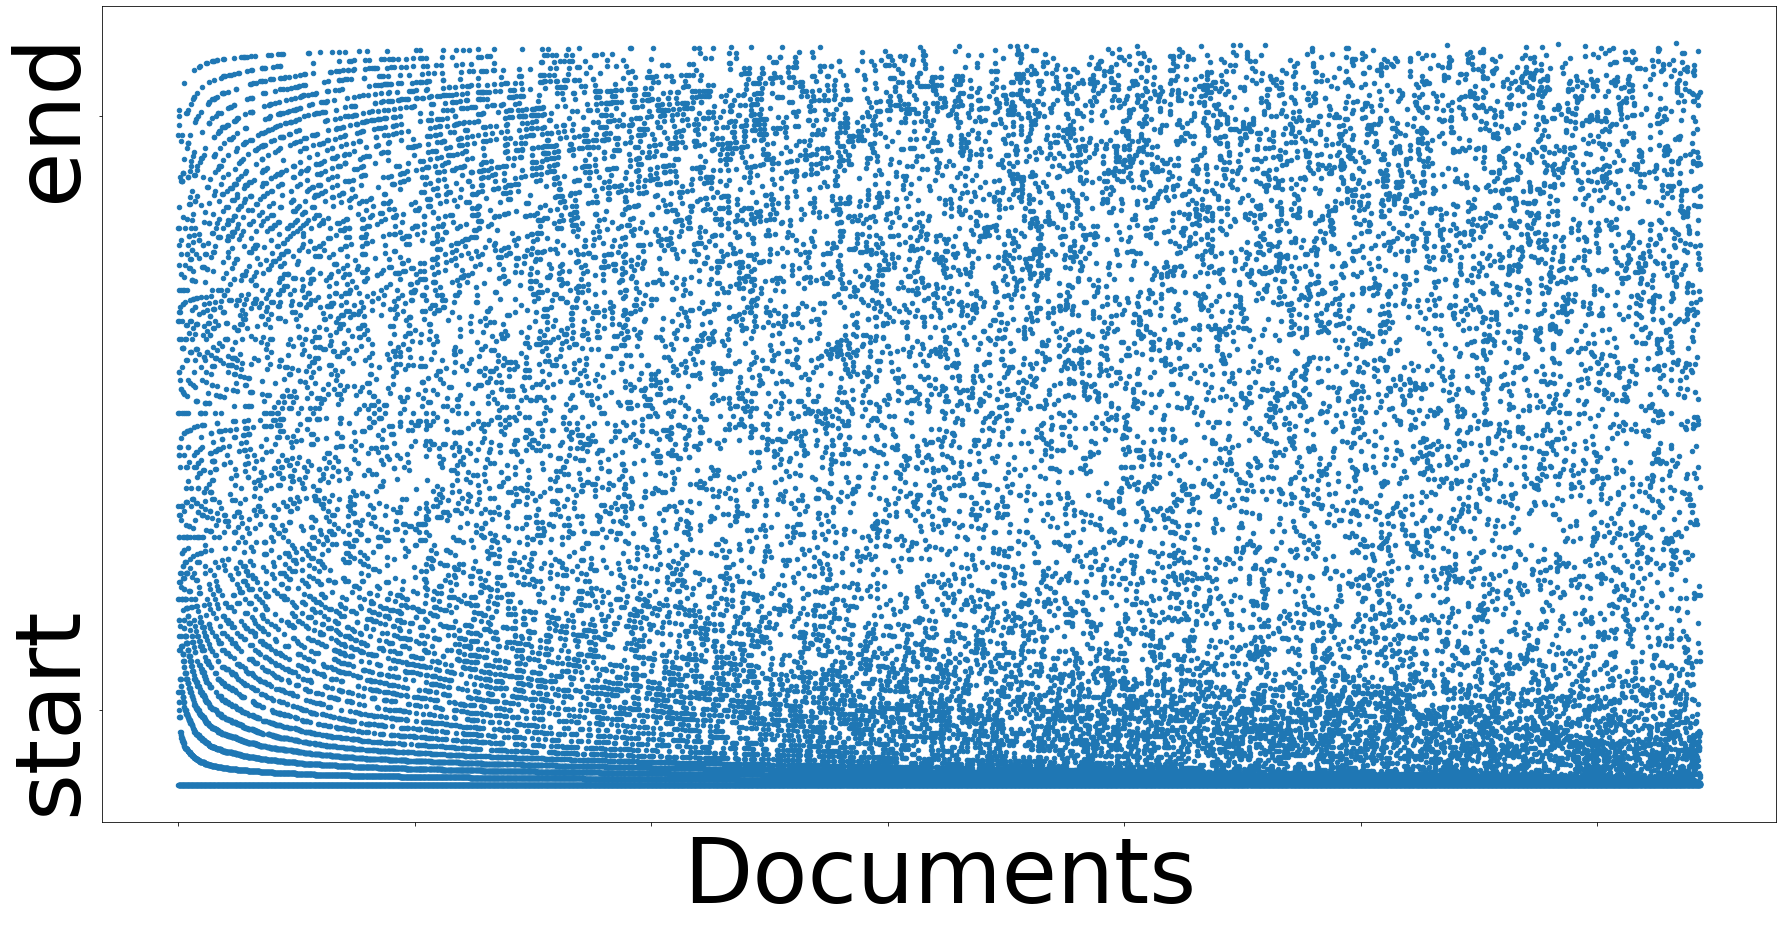

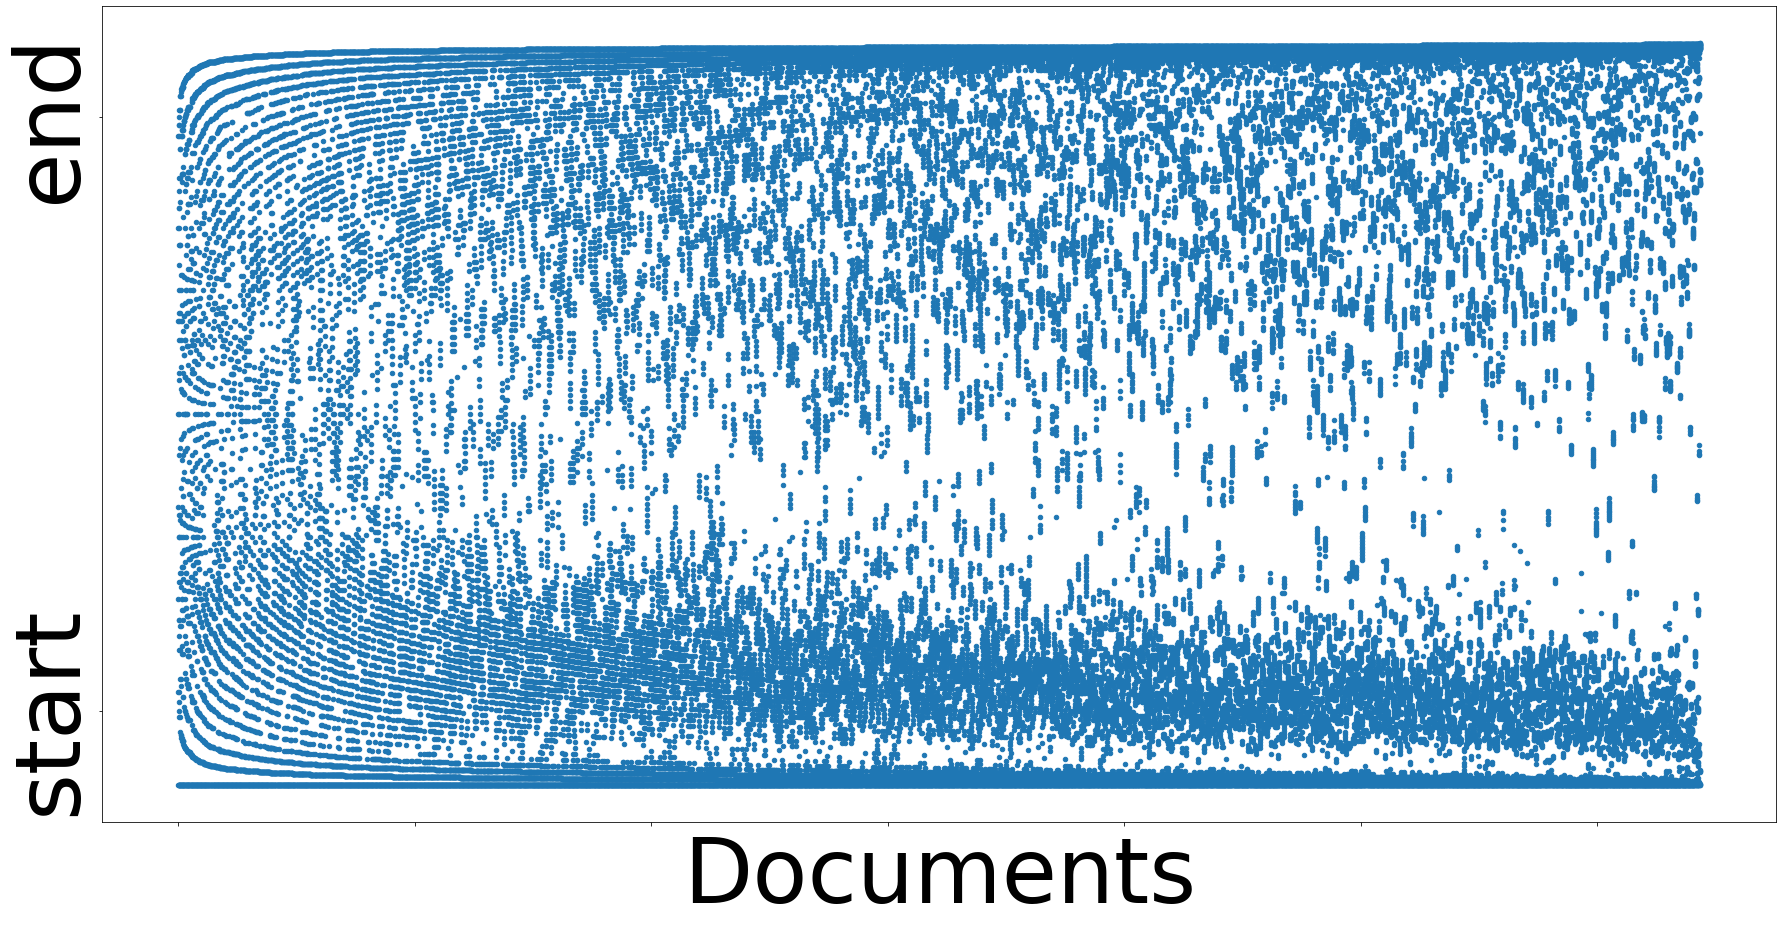

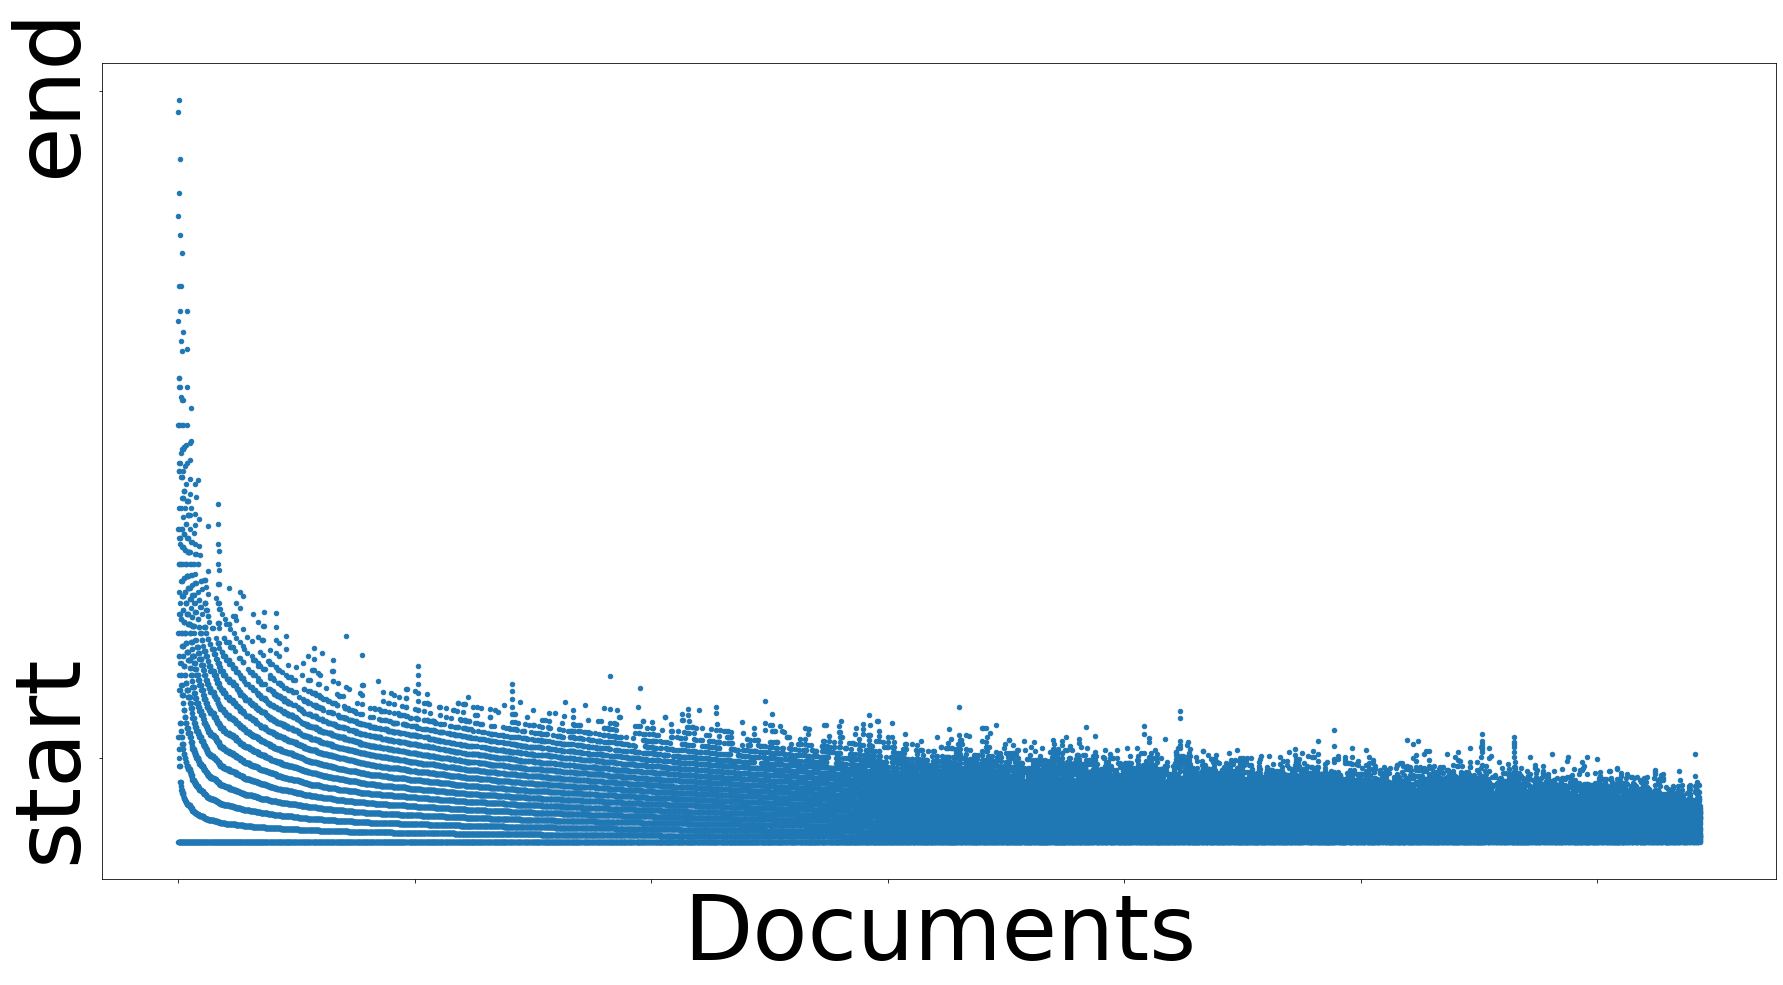

In [56]:
FONTSIZE = 90
FIG_X = 30
FIG_Y = 15
df_pacsum = pd.DataFrame()
df_hiporank = pd.DataFrame()
df_oracle = pd.DataFrame()

df_pacsum["Position"] = pacsum_y
df_pacsum["Document"] = pacsum_x

df_hiporank["Position"] = hiporank_y
df_hiporank["Document"] = hiporank_x

df_oracle["Position"] = oracle_y
df_oracle["Document"] = oracle_x

plt1 = df_oracle.plot(x="Document", y="Position",
                      kind="scatter",  figsize=(FIG_X,FIG_Y), fontsize=FONTSIZE)
plt1.set_xlabel("Documents", size = FONTSIZE)
plt1.set_ylabel("", size = FONTSIZE)

plt1.set_yticks([0.1,0.9])
plt1.set_yticklabels(["start","end"], rotation=90, va="center")
plt1.set_xticklabels([])


plt2 = df_hiporank.plot(x="Document", y="Position",
                        kind="scatter", figsize=(FIG_X,FIG_Y), fontsize=FONTSIZE)
plt2.set_xlabel("Documents", size = FONTSIZE)
plt2.set_ylabel("", size = FONTSIZE)


plt2.set_yticks([0.1,0.9])
plt2.set_yticklabels(["start","end"], rotation=90, va="center")
plt2.set_xticklabels([])


plt3 = df_pacsum.plot(x="Document", y="Position",
                      kind="scatter", figsize=(FIG_X,FIG_Y), fontsize=FONTSIZE)
plt3.set_xlabel("Documents", size = FONTSIZE)
plt3.set_ylabel("", size = FONTSIZE)


plt3.set_yticks([0.1,0.9])
plt3.set_yticklabels(["start","end"], rotation=90, va="center")
plt3.set_xticklabels([])

plt1.figure.savefig('figs/positions_arxiv_oracle.png')
plt2.figure.savefig('figs/positions_arxiv_hr.png')
plt3.figure.savefig('figs/positions_arxiv_ps.png')

In [74]:
abstract = ['<S> \n introduction . </S>', "<S> this empirical paper examines how the housing development board ( hdb ) public housing neighborhood influences older urban singaporeans ' social interactions and ameliorates social isolation </S>", '<S> . methods . using 4,542 observations of noninstitutionalized urban adults </S>', '<S> aged 60 and above , ordered logistic regressions are run to determine the predictors of isolation while controlling for physical health and demographics . results . </S>', '<S> 87% of older singaporeans reside in public housing apartments while 13% reside in private market housing . </S>', '<S> the main predictor of social isolation is living alone and the second main predictor is coresidence with adult children . the relationship between coresidence with adult children and isolation is mediated when controlling for older adult functional limitations . </S>', '<S> the public apartment neighborhood and daily participation in public neighborhood events have substantial effects on reducing the risk of isolation . </S>', '<S> older adult contact with friends alleviates isolation more than contact with non - coresiding relatives . </S>', '<S> conclusion . </S>', '<S> findings suggest that the public neighborhood - built environment in singapore plays a positive role in the social interactions of the elderly . </S>', '<S> knowledge of the factors that decrease the risk of social isolation will have implications for studying morbidity and mortality among the elderly . </S>']

In [76]:
abstract = [a.replace('<S>','').replace('</S>','') for a in abstract]

In [77]:
abstract

[' \n introduction . ',
 " this empirical paper examines how the housing development board ( hdb ) public housing neighborhood influences older urban singaporeans ' social interactions and ameliorates social isolation ",
 ' . methods . using 4,542 observations of noninstitutionalized urban adults ',
 ' aged 60 and above , ordered logistic regressions are run to determine the predictors of isolation while controlling for physical health and demographics . results . ',
 ' 87% of older singaporeans reside in public housing apartments while 13% reside in private market housing . ',
 ' the main predictor of social isolation is living alone and the second main predictor is coresidence with adult children . the relationship between coresidence with adult children and isolation is mediated when controlling for older adult functional limitations . ',
 ' the public apartment neighborhood and daily participation in public neighborhood events have substantial effects on reducing the risk of isolat